In [1]:
import pandas as pd
import numpy as np

In [2]:
!cat train.csv | head

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,,Candra Jacostaffey,True
0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
cat: stdout: Broken p

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(8693, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df['PassengerId'].nunique() == df.shape[0]

True

In [7]:
df.set_index('PassengerId', inplace=True)

In [8]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
df.select_dtypes(include=['object']).columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name'], dtype='object')

In [10]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
df['Transported'].value_counts(normalize=True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

In [12]:
df.sample(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
3422_02,Europa,True,E/209/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Atonib Crakete,True
2702_01,Earth,True,G/437/P,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,0.0,0.0,Mollen Garnettiz,True
2941_01,Earth,False,G/477/P,TRAPPIST-1e,16.0,NaN,24.0,0.0,13.0,717.0,0.0,Coreee Beasleyes,False


In [13]:
df['target'] = 0
df.loc[df['Transported'] == True, 'target'] = 1

In [14]:
df.sample(4)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,target
PassengerId,,,,,,,,,,,,,,
9120_01,Earth,False,F/1763/S,TRAPPIST-1e,13.0,False,101.0,12.0,184.0,780.0,0.0,Sony Maynardner,False,0
0062_01,Earth,False,F/13/S,TRAPPIST-1e,62.0,False,0.0,592.0,0.0,17.0,25.0,Sterry Greeves,False,0
3465_01,Mars,False,F/711/P,TRAPPIST-1e,19.0,False,506.0,0.0,395.0,159.0,229.0,Mone Flaie,False,0
2040_01,Europa,True,B/85/S,TRAPPIST-1e,50.0,False,0.0,0.0,0.0,0.0,0.0,Lesaten Stiven,True,1


In [15]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [16]:
df[df['HomePlanet']=='Earth']['target'].sum()

1951

In [17]:
df.groupby('HomePlanet')['target'].sum()

HomePlanet
Earth     1951
Europa    1404
Mars       920
Name: target, dtype: int64

In [18]:
# Calcular porcentajes

<AxesSubplot:>

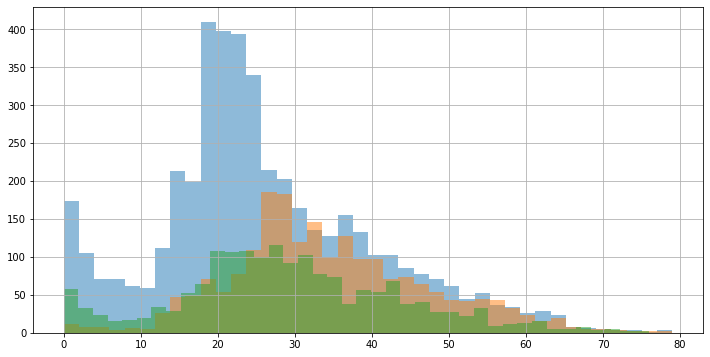

In [19]:
#df.Age.hist(figsize=(12,6), bins=40, alpha=0.5)
df[df['HomePlanet']=='Earth'].Age.hist(figsize=(12,6), bins=40, alpha=0.5)
df[df['HomePlanet']=='Europa'].Age.hist(figsize=(12,6), bins=40, alpha=0.5)
df[df['HomePlanet']=='Mars'].Age.hist(figsize=(12,6), bins=40, alpha=0.5)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

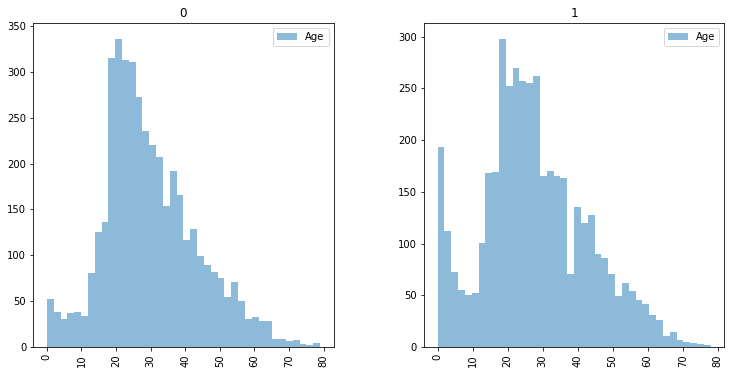

In [21]:
df.hist(column='Age',by='target',figsize=(12,6), bins=40, alpha=0.5, legend=True)

<AxesSubplot:>

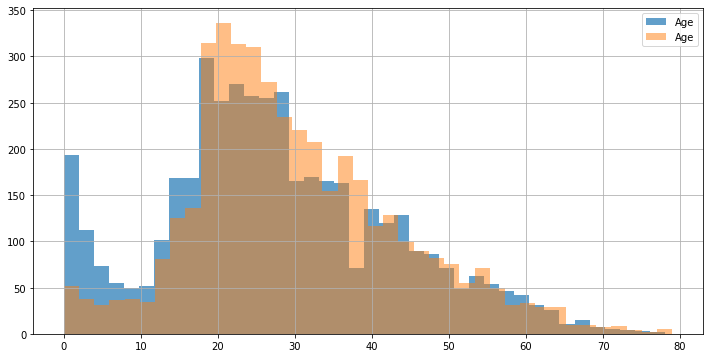

In [22]:
df[df['target']==1].Age.hist(figsize=(12,6), bins=40, alpha=0.7, legend=True)
df[df['target']==0].Age.hist(figsize=(12,6), bins=40, alpha=0.5, legend=True)

In [23]:
df[df['HomePlanet']=='Earth'].Age.describe()

count    4514.000000
mean       26.068232
std        14.317496
min         0.000000
25%        18.000000
50%        23.000000
75%        35.000000
max        79.000000
Name: Age, dtype: float64

In [24]:
df[df['HomePlanet']=='Europa'].Age.describe()

count    2085.000000
mean       34.419664
std        13.089347
min         0.000000
25%        26.000000
50%        33.000000
75%        43.000000
max        79.000000
Name: Age, dtype: float64

In [25]:
df[df['HomePlanet']=='Mars'].Age.describe()

count    1716.000000
mean       29.297203
std        14.558386
min         0.000000
25%        20.000000
50%        28.000000
75%        38.000000
max        76.000000
Name: Age, dtype: float64

In [26]:
df[df['HomePlanet']=='Mars'].Age.describe()

count    1716.000000
mean       29.297203
std        14.558386
min         0.000000
25%        20.000000
50%        28.000000
75%        38.000000
max        76.000000
Name: Age, dtype: float64

In [20]:
num_cols = list(df.select_dtypes(include=['float']).columns)

In [21]:
df[num_cols].isnull().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [22]:
df[(df['HomePlanet']=='Mars')&(df['Age'].isnull())].head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,target
PassengerId,,,,,,,,,,,,,,
0068_01,Mars,False,E/4/S,TRAPPIST-1e,NaN,False,793.0,0.0,2.0,253.0,0.0,Cinst Binie,False,0
0527_01,Mars,False,F/93/S,55 Cancri e,NaN,False,1172.0,11.0,3.0,0.0,4.0,Supce Stité,False,0
0593_01,Mars,False,D/24/P,TRAPPIST-1e,NaN,NaN,43.0,152.0,182.0,1.0,2005.0,Hon Kra,False,0
0684_01,Mars,False,F/145/P,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Sug Conie,True,1
0809_02,Mars,False,F/151/S,TRAPPIST-1e,NaN,False,1227.0,42.0,1.0,0.0,0.0,Crin Meake,False,0


In [23]:
df[df['HomePlanet']=='Mars'].Age.mean()

29.297202797202797

In [24]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [25]:
planets = ['Europa', 'Earth', 'Mars']

In [27]:
df.groupby('HomePlanet')['Age'].mean()

HomePlanet
Earth     26.068232
Europa    34.419664
Mars      29.297203
Name: Age, dtype: float64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

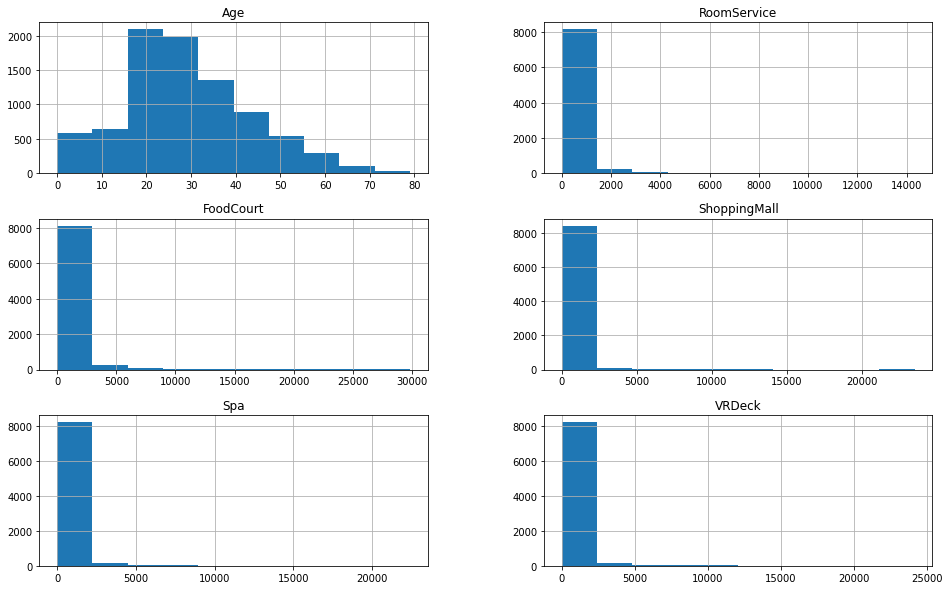

In [28]:
df[num_cols].hist(figsize=(16,10))

In [29]:
df[num_cols].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [30]:
np.nanpercentile(df['RoomService'], 99.9)

7711.136000000872

In [31]:
for num in num_cols:
    df.loc[ df[num].isnull() , num] = np.nanpercentile(df[num], 99.9)
    df[num] = df[num].map(lambda x: np.log(1 + x))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

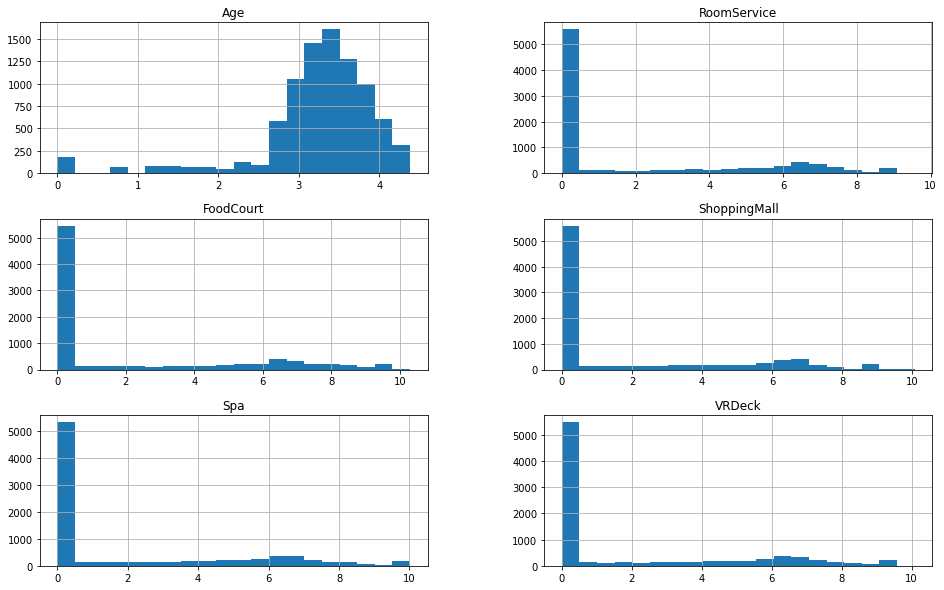

In [32]:
df[num_cols].hist(bins=20, figsize=(16,10))

<AxesSubplot:>

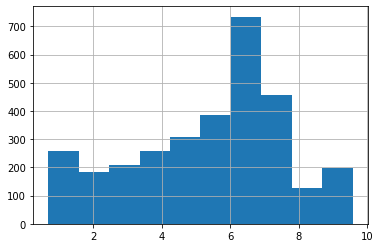

In [33]:
df[df['RoomService']>0]['RoomService'].hist()

### Categorical data

In [34]:
# Drop the name
df.drop(columns='Name', inplace=True)

In [35]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
cat_cols

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [36]:
df[cat_cols].isnull().sum()

HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
VIP            203
dtype: int64

In [37]:
for cat in cat_cols:
    print(cat,df[cat].nunique(),df[cat].unique())

HomePlanet 3 ['Europa' 'Earth' 'Mars' nan]
CryoSleep 2 [False True nan]
Cabin 6560 ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination 3 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP 2 [False True nan]


In [38]:
# Creamos una nueva categoria en cada caso, por ejemplo la cabina "cabin_nibiru"

for cat in cat_cols:
    df.loc[ (df[cat].isnull()) , cat] = cat+'_nibiru'
    df[cat] = df[cat].apply(lambda x : str(x))

## Modeling

In [39]:
X = df[num_cols+cat_cols]
y = df['target']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X,y, 
                                                    random_state=2022, 
                                                    test_size=0.3,
                                                    stratify =y)

In [42]:
# statistical learning
from sklearn.linear_model import LogisticRegression

# tree based methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# DNN
from sklearn.neural_network import MLPClassifier

# To measure performance
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [43]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
ordinal_enc = OrdinalEncoder(handle_unknown="use_encoded_value",
                             unknown_value = 9999)

In [45]:
x_train[cat_cols] = ordinal_enc.fit_transform(x_train[cat_cols])

In [55]:
dt = RandomForestClassifier(max_depth=5,
                            random_state=2022)

In [47]:
dt = DecisionTreeClassifier(#ccp_alpha=, 
                            criterion='gini', 
                            max_depth=4,
                            #max_features=12, 
                            random_state=2022)

In [48]:
x_test[cat_cols] = ordinal_enc.transform(x_test[cat_cols])

In [56]:
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

In [51]:
accuracies =dict()
recall = dict()

In [57]:
accuracies['Decision Tree Classifier'] = accuracy_score(y_pred, y_test)
recall['Decision Tree Classifier'] = metrics.recall_score(y_test,y_pred)

print('Accuracy of Decision Tree Classifier is: ', accuracy_score(y_test,y_pred))
print('Recall Score of Decision Tree Classifier is: ', metrics.recall_score(y_test, y_pred))

Accuracy of Decision Tree Classifier is:  0.7848926380368099
Recall Score of Decision Tree Classifier is:  0.7715156130997716


In [53]:
from sklearn.metrics import confusion_matrix as cfm
from sklearn.metrics import classification_report

In [58]:
cfm(y_test, y_pred)

array([[1034,  261],
       [ 300, 1013]])

# A partir de aqui son validaciones que se hicieron en cualquier orden y no van a salir al ejecutarse una tras otra...

Random forest

* precision en 1: 1050/ 1050 + 289 = 78.4%
* precision en 0: 1006/ 1006 + 263 = 79.3%

In [139]:
1006/ (1006 + 263)

0.7927501970055162

In [83]:
len(y_test) - y_test.sum(), y_test.sum()

(1295, 1313)

* falsos positivos = 477
* falsos negativos = 259

* Con un corte en 0.5: 818/1295 = 62.6% 0's correctamente clasificados, 80.3%
* Con un corte en 0 : 62.7% 0s, 81.49% 1s
* Con un corte en 1 : 78.6% 0s, 23.8% 1s

In [127]:
1070/1313, 243/1313

(0.814927646610815, 0.18507235338918507)

In [128]:
986/1295

0.7613899613899614

In [443]:
x_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Cabin,Destination,VIP
PassengerId,,,,,,,,,,,
8244_01,3.332205,6.915723,0.000000,0.000000,2.302585,0.000000,-0.824843,-0.625417,5.247383,0.618748,-0.212406
8060_01,3.688879,7.222566,5.560682,6.867974,0.693147,3.401197,1.489205,-0.625417,-0.108330,0.618748,-0.212406
4311_01,3.135494,6.335054,6.257668,5.899897,0.000000,0.000000,-0.824843,-0.625417,5.247383,0.618748,-0.212406
8986_01,2.995732,0.000000,6.698268,3.091042,6.670766,9.437712,-0.824843,-0.625417,5.247383,0.618748,-0.212406
0808_01,3.465736,5.075174,4.709530,6.553933,0.000000,2.397895,-0.824843,-0.625417,5.247383,0.618748,-0.212406


In [276]:
x_test['probas'] = list(clf.predict_proba(x_test[num_cols+cat_cols])[:,1])

In [285]:
x_test['corte052'] = 1
x_test.loc[x_test['probas'] < 0.512, 'corte052'] = 0

In [286]:
cfm(y_test, x_test['corte052'])

array([[1016,  279],
       [ 280, 1033]])

In [110]:
313/1313 * 100

23.83853769992384

<AxesSubplot:>

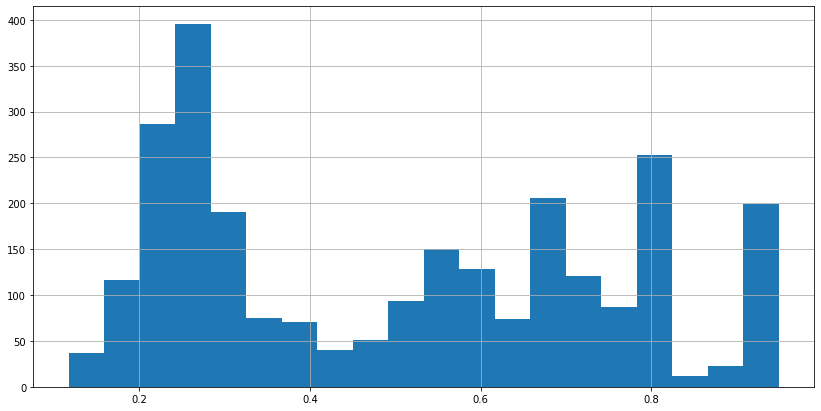

In [287]:
x_test['probas'].hist(bins=20, figsize=(14,7))

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1295
           1       0.80      0.77      0.78      1313

    accuracy                           0.78      2608
   macro avg       0.79      0.78      0.78      2608
weighted avg       0.79      0.78      0.78      2608



# Kaggle submission

In [60]:
!ls

First_nb.ipynb        sample_submission.csv train.csv
LICENSE               test.csv
README.md             test_sub.csv


In [61]:
!cat sample_submission.csv | head

PassengerId,Transported
0013_01,False
0018_01,False
0019_01,False
0021_01,False
0023_01,False
0027_01,False
0029_01,False
0032_01,False
0032_02,False
cat: stdout: Broken pipe


In [62]:
test = pd.read_csv('test.csv')

In [63]:
for num in num_cols:
    test.loc[ test[num].isnull() , num] = np.nanpercentile(test[num], 99.9)
    test[num] = test[num].map(lambda x: np.log(1 + x))

In [64]:
for cat in cat_cols:
    test.loc[ (test[cat].isnull()) , cat] = cat+'_Nibiru'
    test[cat] = test[cat].apply(lambda x : str(x))

In [65]:
test[cat_cols] = ordinal_enc.transform(test[cat_cols])

In [67]:
test['probas'] = list(dt.predict_proba(test[num_cols+cat_cols])[:,1])

<AxesSubplot:>

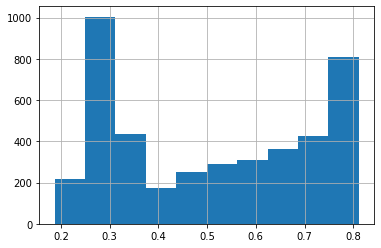

In [68]:
test['probas'].hist()

In [69]:
test['Transported'] = True
test.loc[test['probas']<0.512, 'Transported'] = False

In [70]:
test[['PassengerId', 'Transported']].to_csv('test_sub.csv', index=False)

In [71]:
!cat test_sub.csv | head

PassengerId,Transported
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False
0027_01,True
0029_01,True
0032_01,True
0032_02,True
